In [51]:
import cv2
import json
import numpy as np
import os
from PIL import Image
from  matplotlib import pyplot as plt
%matplotlib inline



In [56]:
annotation_path = './datasets/Rice/annotations/instances_train.json'
read_img_id = 0

In [57]:
f = open(annotation_path)
data = json.load(f)
img_id, img_name = data['images'][read_img_id]['id'], data['images'][read_img_id]['file_name']
print(data['images'][read_img_id])
print(img_id, img_name)

{'id': 0, 'file_name': 'DSC080454.JPG'}
0 DSC080454.JPG


In [58]:
annotations_len = len(data['annotations'])
bboxs = []

for i in range(0,annotations_len):
    if data['annotations'][i]['image_id'] != img_id : 
        continue
    bboxs.append(data['annotations'][i]['bbox'])

./datasets/Rice/train/DSC080454.JPG


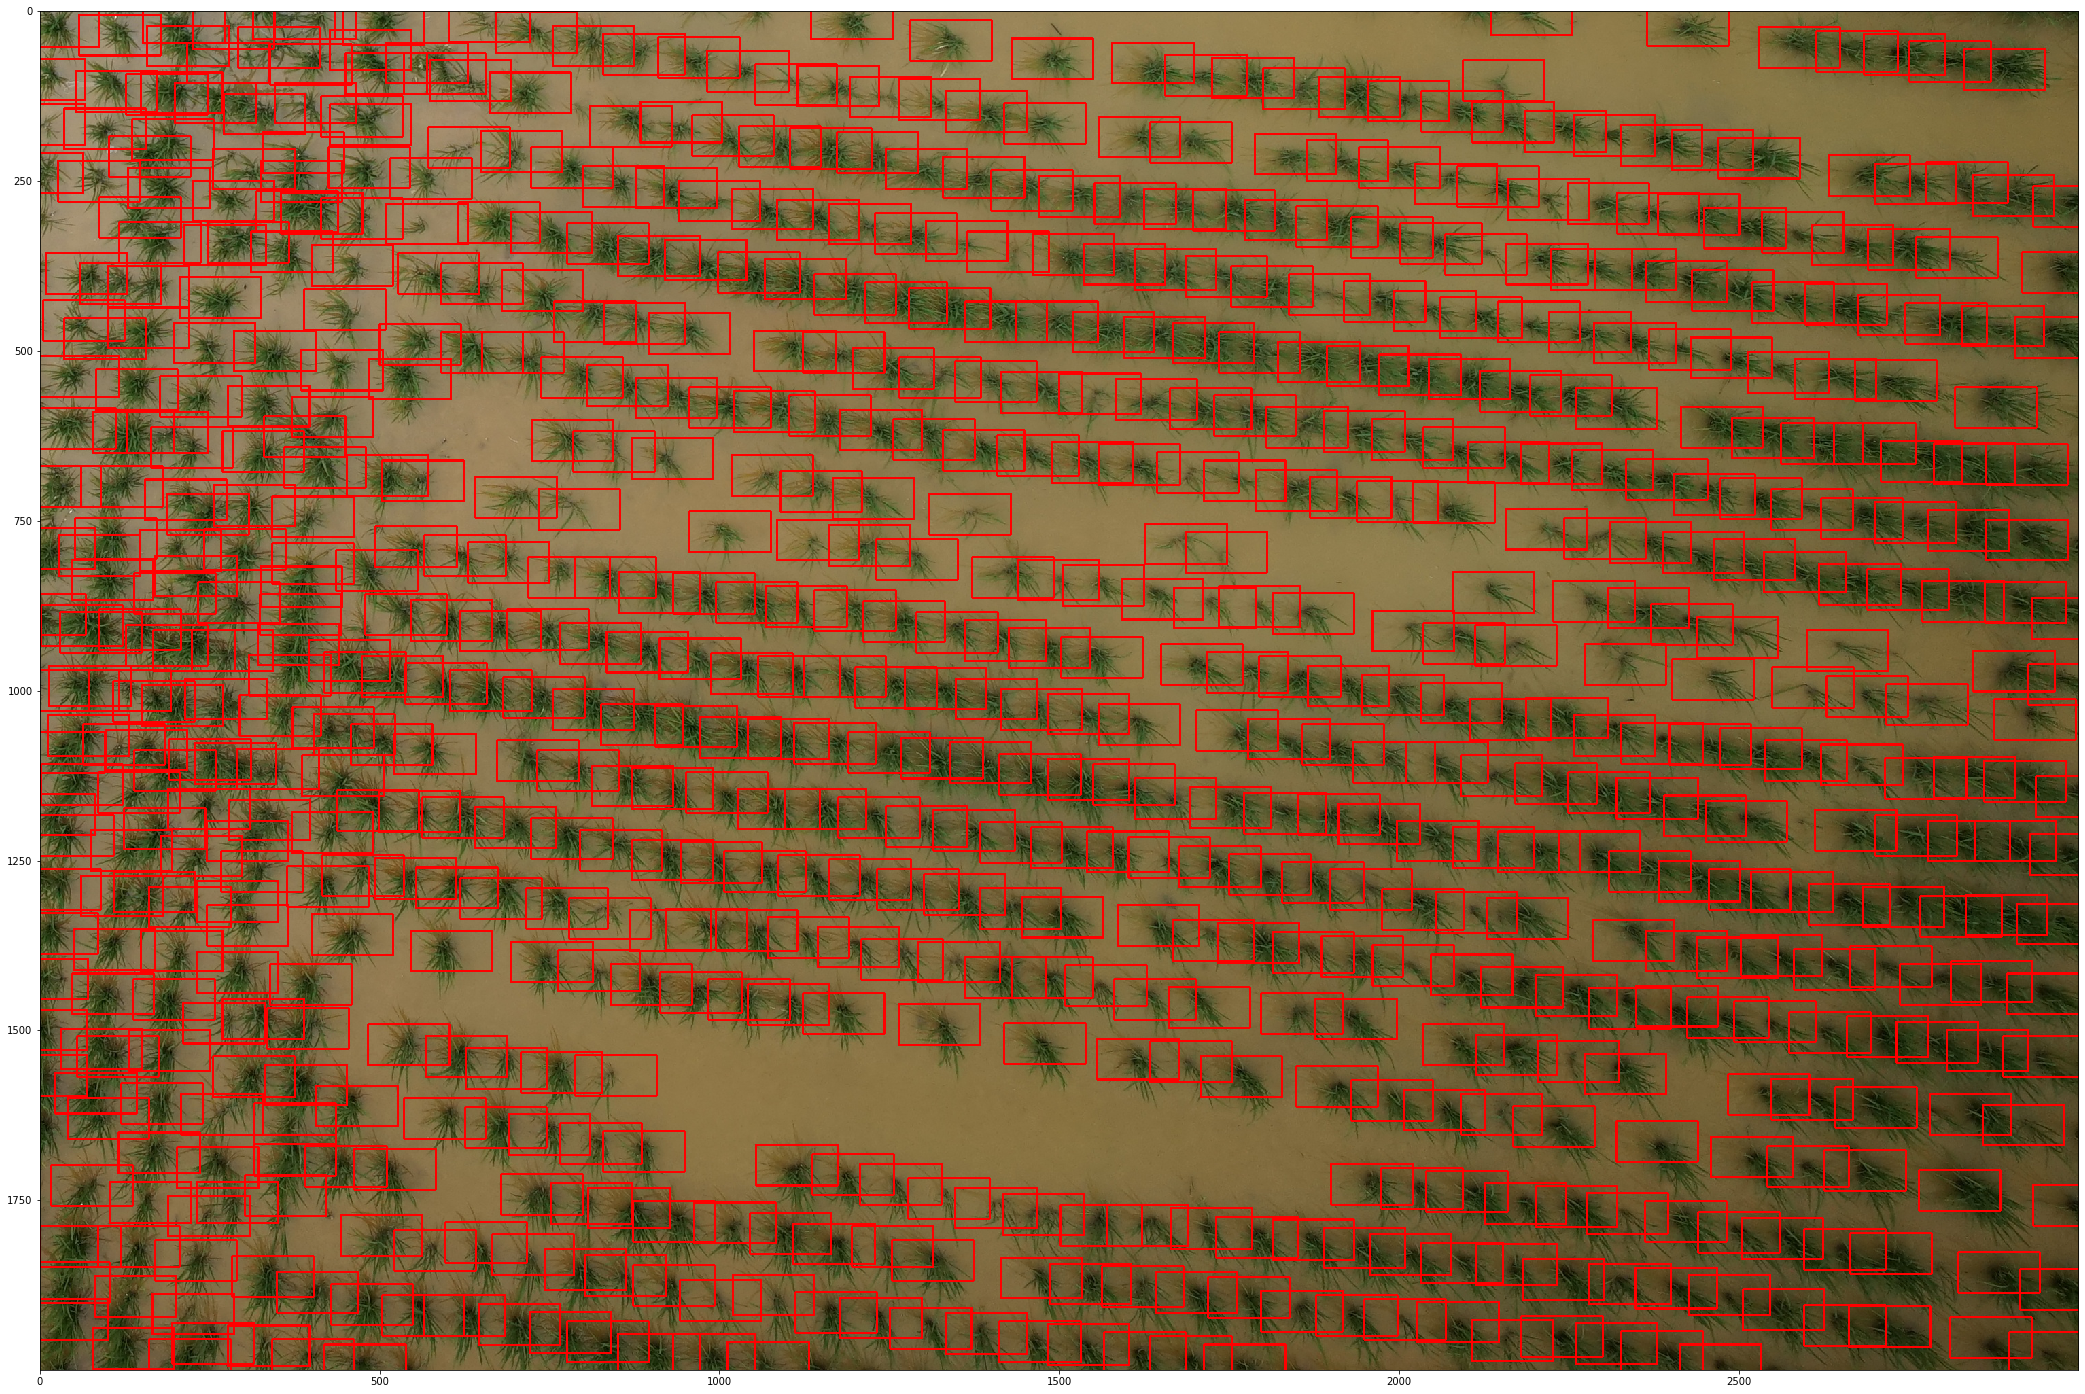

In [59]:
img_path = os.path.join('./datasets/Rice/train',img_name)
img = Image.open(img_path, mode='r').convert('RGB')

print(img_path)
out_img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

for i in range(len(bboxs)):
    x,y,w,h = int(bboxs[i][0]), int(bboxs[i][1]), int(bboxs[i][2]), int(bboxs[i][3])
    x1,y1,x2,y2 = x-w, y-h, x+w, y+h
    out_img = cv2.rectangle(out_img, (x1,y1), (x2,y2), (0, 0, 255), 2)

plt.rcParams["figure.figsize"] = (38,25)
out_img = out_img[:,:,::-1] #BGR->RGB
plt.imshow(out_img)
plt.show()
f.close()

### observe all data annotations in json

In [ ]:
annotation_path = './datasets/Rice/annotations/instances_train.json'
f = open(annotation_path)
data = json.load(f)

for read_img_id in range(0,len(image_path)):
    img_id, img_name = data['images'][read_img_id]['id'], data['images'][read_img_id]['file_name']
    #print(img_id, img_name)
    annotations_len = len(data['annotations'])
    bboxs = []

    for i in range(0,annotations_len):
        if data['annotations'][i]['image_id'] != img_id : 
            continue
        bboxs.append(data['annotations'][i]['bbox'])

    img_path = os.path.join('./datasets/Rice/train',img_name)
    img = Image.open(img_path, mode='r').convert('RGB')

    out_img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

    for i in range(len(bboxs)):
        x,y,w,h = int(bboxs[i][0]), int(bboxs[i][1]), int(bboxs[i][2]), int(bboxs[i][3])
        x1,y1,x2,y2 = x-w, y-h, x+w, y+h
        out_img = cv2.rectangle(out_img, (x1,y1), (x2,y2), (0, 0, 255), 2)

    out_img = out_img[:,:,::-1] #BGR->RGB
    plt.imsave('./observe_data/'+img_name[:-4]+'_observe.jpg',out_img)

f.close()